In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [43]:

# Set a seed for reproducibility
np.random.seed(42)

num_qubits = 4
dev = qml.device("default.qubit", wires=num_qubits)
gate_set = [qml.RX, qml.RY, qml.RZ]


def rand_circuit(params, random_gate_sequence=None, num_qubits=None):
    """A random variational quantum circuit.

    Args:
        params (array[float]): array of parameters
        random_gate_sequence (dict): a dictionary of random gates
        num_qubits (int): the number of qubits in the circuit

    Returns:
        float: the expectation value of the target observable
    """
    #for i in range(num_qubits):
    #    qml.RY(np.pi / 4, wires=i)

    for i in range(num_qubits):
        random_gate_sequence[i](params[i], wires=i)

    #for i in range(num_qubits - 1):
    #    qml.CZ(wires=[i, i + 1])

    H = np.zeros((2 ** num_qubits, 2 ** num_qubits))
    H[0, 0] = 1
    wirelist = [i for i in range(num_qubits)]
    return qml.expval(qml.Hermitian(H, wirelist))

In [44]:
grad_vals = []
num_samples = 200

for j in range(num_samples):
    gate_sequence = {i: np.random.choice(gate_set) for i in range(num_qubits)}
    qcircuit = qml.QNode(rand_circuit, dev, interface="autograd")
    grad = qml.grad(qcircuit, argnum=0)
    params = np.random.uniform(0, 2 * np.pi, size=num_qubits)
    gradient = grad(params, random_gate_sequence=gate_sequence, num_qubits=num_qubits)
    grad_vals.append(gradient[-1])

print("Variance of the gradients for {} random circuits: {}".format(
    num_samples, np.var(grad_vals)
    )
)
print("Mean of the gradients for {} random circuits: {}".format(
    num_samples, np.mean(grad_vals)))


Variance of the gradients for 200 random circuits: 0.013166627416815574
Mean of the gradients for 200 random circuits: 0.008858374220369954


In [45]:
for i in range(num_samples):
    gate_sequence = {i: np.random.choice(gate_set) for i in range(num_qubits)}
    print(str(gate_sequence[0])[-4:-2],str(gate_sequence[1])[-4:-2],str(gate_sequence[2])[-4:-2],str(gate_sequence[3])[-4:-2],str(gate_sequence[4])[-4:-2])

KeyError: 4

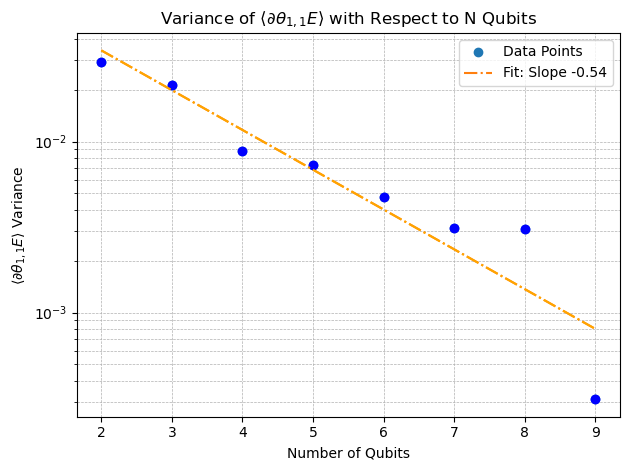

In [49]:
qubits = [2, 3, 4, 5, 6,7,8,9]
variances = []


for num_qubits in qubits:
    grad_vals = []
    for i in range(num_samples):
        dev = qml.device("default.qubit", wires=num_qubits)
        qcircuit = qml.QNode(rand_circuit, dev, interface="autograd")
        grad = qml.grad(qcircuit, argnum=0)

        gate_set = [qml.RX, qml.RY, qml.RZ]
        random_gate_sequence = {i: np.random.choice(gate_set) for i in range(num_qubits)}

        params = np.random.uniform(0, np.pi, size=num_qubits)
        gradient = grad(
            params, random_gate_sequence=random_gate_sequence, num_qubits=num_qubits
        )
        grad_vals.append(gradient[-1])
    variances.append(np.var(grad_vals))

variances = np.array(variances)
qubits = np.array(qubits)


# Fit the semilog plot to a straight line
p = np.polyfit(qubits, np.log(variances), 1)


# Plot the straight line fit to the semilog
plt.semilogy(qubits, variances, "o", label="Data Points")
plt.semilogy(qubits, np.exp(p[0] * qubits + p[1]), "-.", label="Fit: Slope {:3.2f}".format(p[0]))

# Customizing the plot
plt.title("Variance of $\\langle \\partial \\theta_{1, 1} E\\rangle$ with Respect to N Qubits")
plt.xlabel("Number of Qubits")
plt.ylabel("$\\langle \\partial \\theta_{1, 1} E\\rangle$ Variance")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Customize colors and styles if desired
plt.semilogy(qubits, variances, "o", color='blue', label="Data Points")
plt.semilogy(qubits, np.exp(p[0] * qubits + p[1]), "-.", color='orange', label="Fit: Slope {:3.2f}".format(p[0]))

plt.show()
